Data is located in gs://${GCS_BUCKET}/datasets.      
There should be bird, dog_breed, food, fungus, leaf folder.

The original zipped file is there.
The processed folder is also there

In [ ]:
!gsutil ls gs://${GCS_BUCKET}/datasets

In [ ]:
!mkdir -p data

# Download

In [ ]:
!gsutil -m cp -r  gs://${GCS_BUCKET}/datasets/dog_breed/* data/

In [ ]:
! ls data/processed

In [1]:
aa

In [2]:
import fastai
from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *
from glob import glob
import pandas as pd
import helper
from tqdm import tqdm
import hashlib

In [3]:
%matplotlib inline
%load_ext autoreload

%autoreload 2

# Generate labels.csv

In [4]:


BASE_PATH= "data/processed/"

records = []
for image in glob(f"{BASE_PATH}**/*.jpg"):
    dir_ = image.split('/')
    file_, species = dir_[-1], dir_[-2]

    records.append({
        "file": image,
        "class": species.replace(" ", "_")
    })

labels_df = pd.DataFrame(records)
labels_df.to_csv('labels.csv', index=False)

In [5]:
labels_df.head()

class                                               file
0  italian_greyhound  data/processed/italian_greyhound/b8e233e679db8...
1  italian_greyhound  data/processed/italian_greyhound/14a44cf4253e8...
2  italian_greyhound  data/processed/italian_greyhound/b8876a1aae766...
3  italian_greyhound  data/processed/italian_greyhound/39c5e61548705...
4  italian_greyhound  data/processed/italian_greyhound/80ae1fe5dcf24...

In [6]:
num_classes = len(labels_df['class'].unique())
num_classes

120

In [7]:
labels_df['class'].value_counts()

scottish_deerhound                126
maltese_dog                       117
afghan_hound                      116
entlebucher                       115
bernese_mountain_dog              114
shih-tzu                          112
great_pyrenees                    111
pomeranian                        111
basenji                           110
samoyed                           109
tibetan_terrier                   107
airedale                          107
cairn                             106
leonberg                          106
beagle                            105
japanese_spaniel                  105
miniature_pinscher                102
blenheim_spaniel                  102
australian_terrier                102
irish_wolfhound                   101
saluki                             99
lakeland_terrier                   99
papillon                           96
whippet                            95
norwegian_elkhound                 95
siberian_husky                     95
pug         

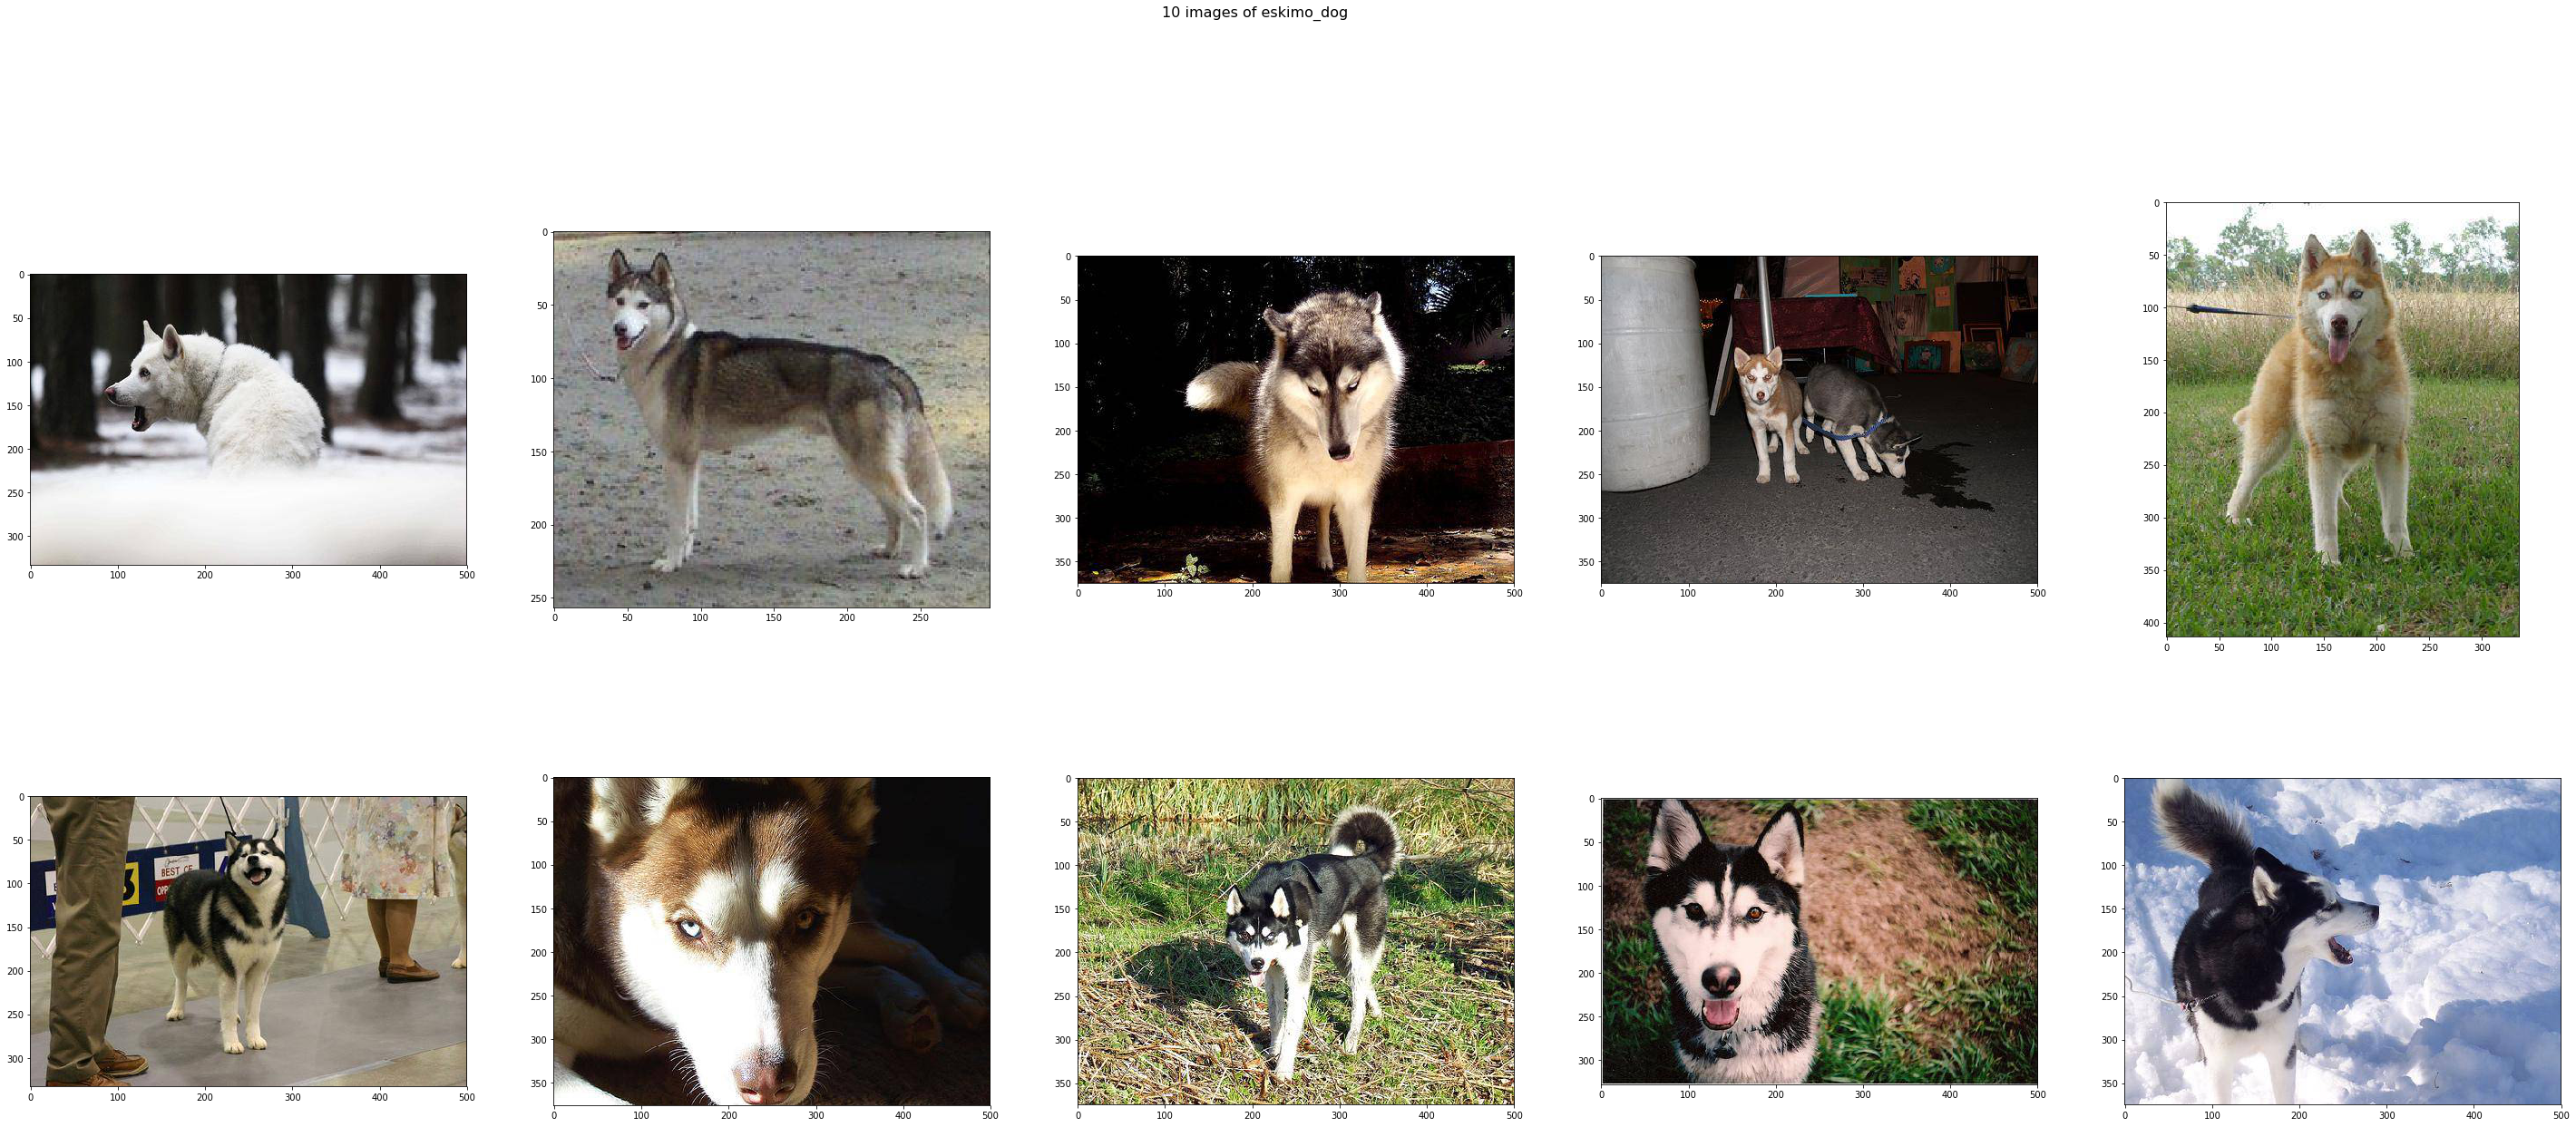

In [8]:
helper.display_images_from_class(labels_df,label='eskimo_dog',num_images=10 )

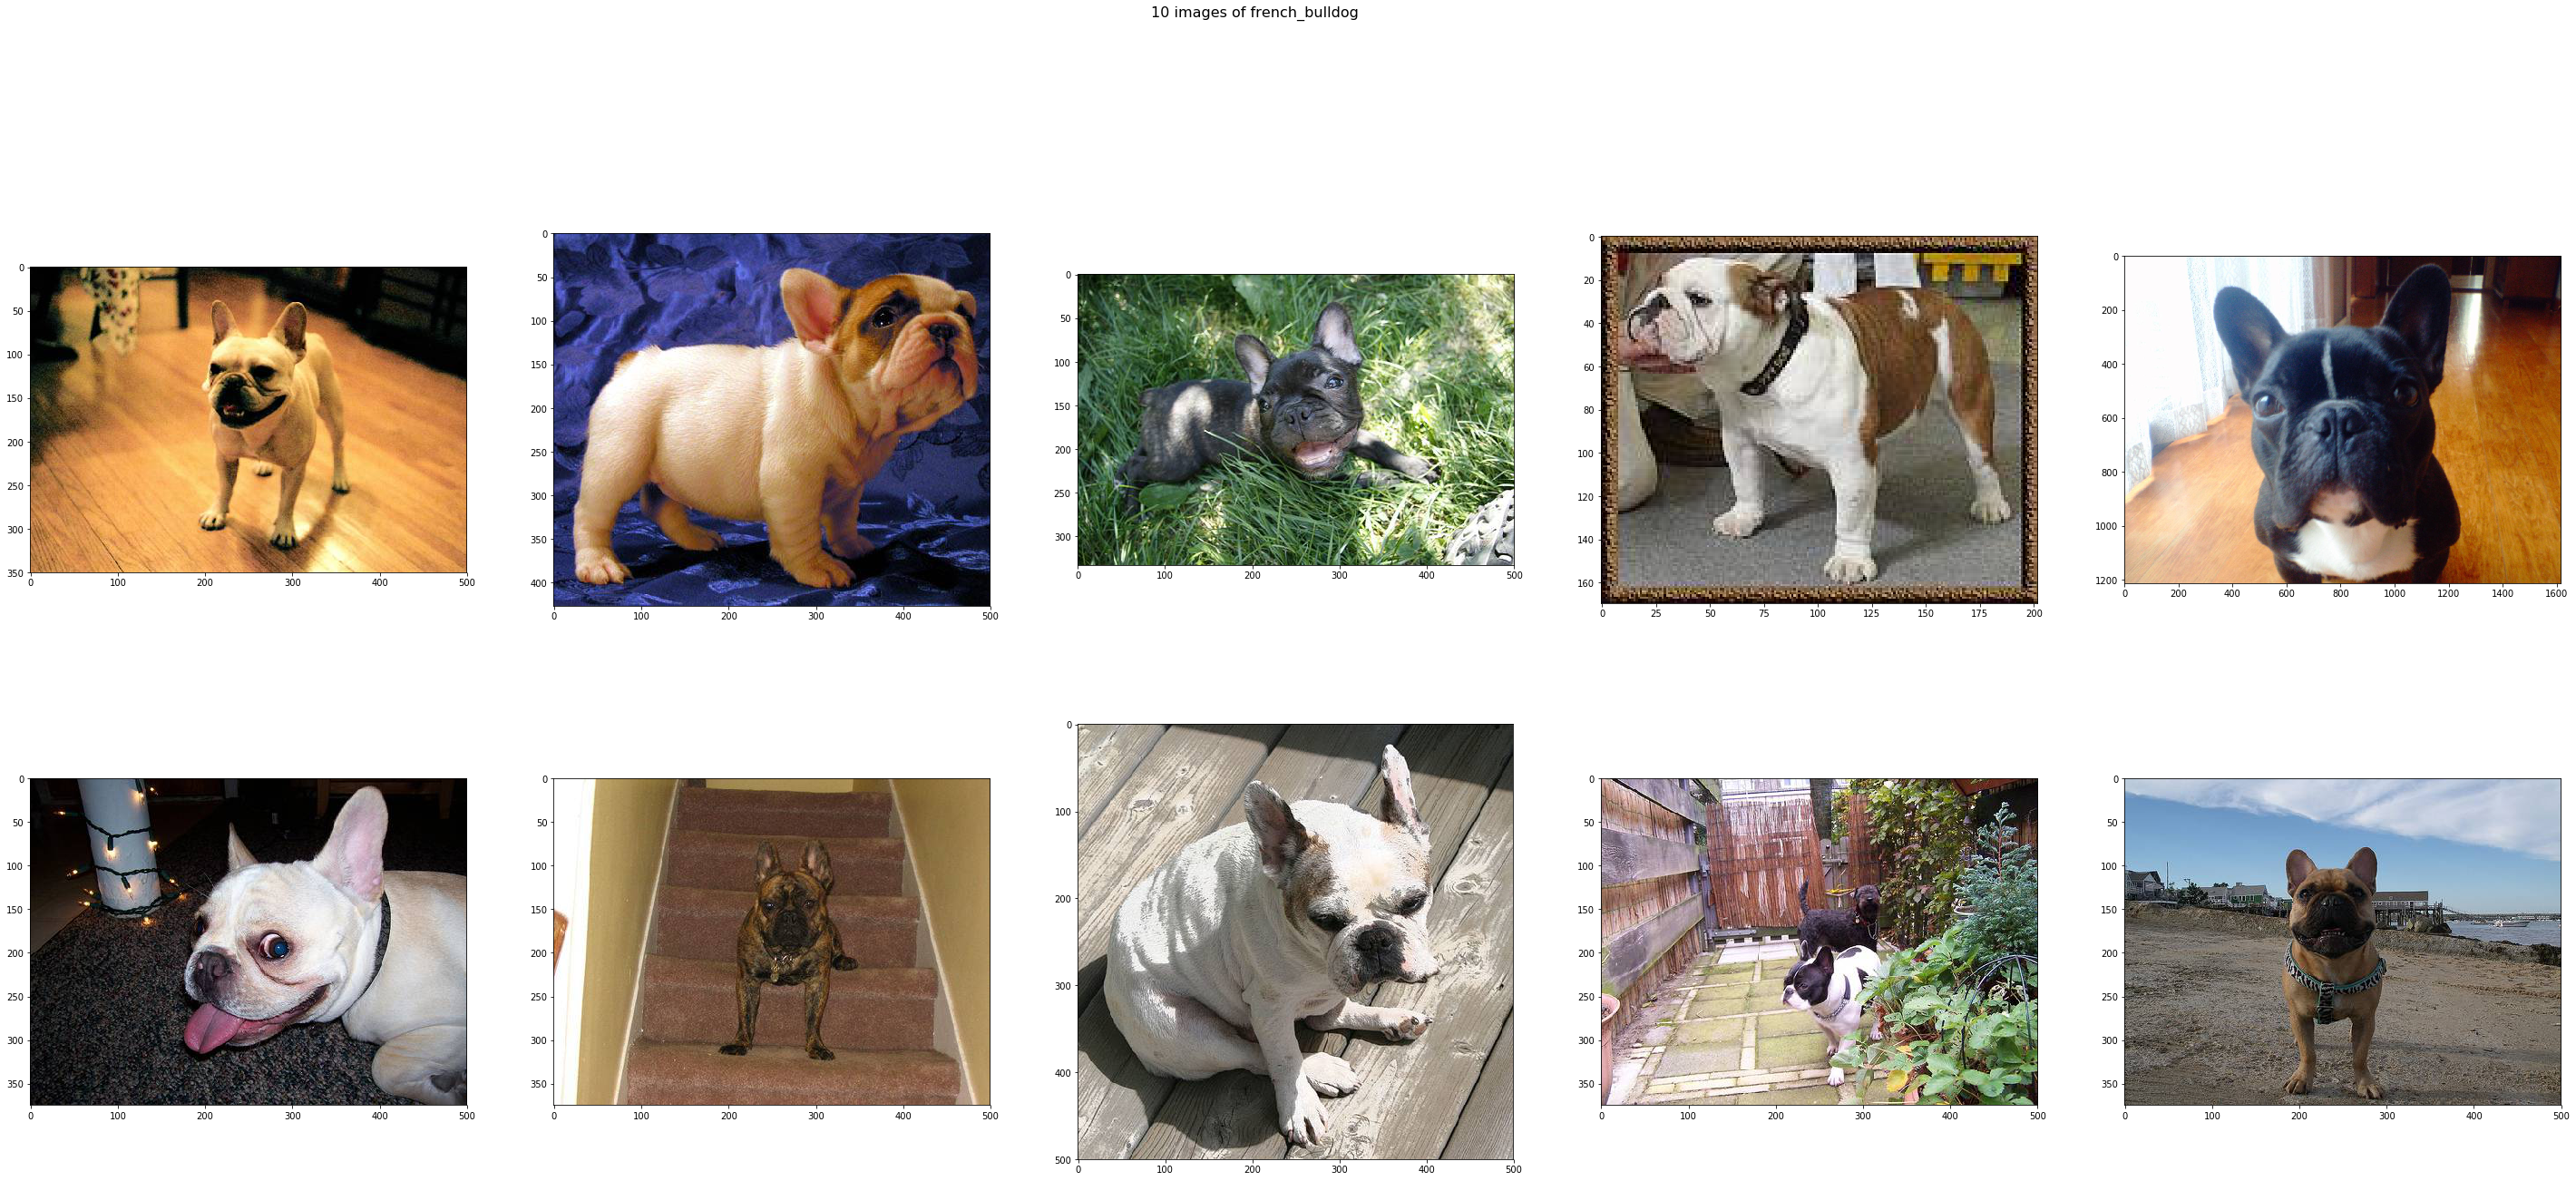

In [9]:
helper.display_images_from_class(labels_df,label='french_bulldog',num_images=10 )

In [10]:
PATH = "data/processed/"


**Save only first n classes **

In [11]:
n = num_classes
topn_classes = labels_df['class'].value_counts()[0:n].index.tolist()

In [13]:
labels_df[labels_df['class'].isin(topn_classes)].to_csv('labels.csv')

** Validation data **

In [41]:
label_csv = f'labels.csv'
n = len(list(open(label_csv)))-1
val_idxs = get_cv_idxs(n)


In [44]:
def save_images(list_images,dest='train'):
    for img_path in tqdm(list_images):
        paths = img_path.split("/")
        class_name, img_file = paths[-2],paths[-1]
        
        os.makedirs(f"{dest}/{class_name}",exist_ok=True)
        shutil.copy(img_path,f"{dest}/{class_name}/{img_file}")
        

In [45]:
shutil.rmtree('data/train',ignore_errors=True)
shutil.rmtree('data/valid',ignore_errors=True)

In [52]:
save_images(labels_df.iloc[val_idxs]['file'], dest='data/valid')
train_set = labels_df[~labels_df.index.isin(val_idxs)]
save_images(train_set['file'], dest='data/train')

100%|██████████| 8178/8178 [00:01<00:00, 5858.91it/s]
